In [29]:
import pandas as pd
import gcsfs

project = "level-scheme-471117-i9"
path = "gs://derma-datasets/raw/scin/dx-scin-public-data/dataset/scin_labels.csv"

fs = gcsfs.GCSFileSystem(project=project)
df = pd.read_csv(fs.open(path))
df.head()

,case_id,dermatologist_gradable_for_skin_condition_1,dermatologist_gradable_for_skin_condition_2,dermatologist_gradable_for_skin_condition_3,dermatologist_skin_condition_on_label_name,dermatologist_skin_condition_confidence,weighted_skin_condition_label,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1000600354148496558,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Inflicted skin lesions', 'Eczema', 'Irritant...","[4, 4, 3]","{'Inflicted skin lesions': 0.41, 'Eczema': 0.4...",YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1002039107727665188,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Prurigo nodularis', 'Actinic Keratosis', 'SC...","[4, 3, 4]","{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41,...",YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1003358831658393077,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Impetigo', 'Herpes Zoster', 'Bullous dermati...","[2, 1, 1]","{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bul...",YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1003826561155964328,NO_IMAGE_QUALITY_INSUFFICIENT,NaN,NaN,[],[],{},NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1003844406100696311,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Lichen planus/lichenoid eruption', 'Follicul...","[1, 1, 1]","{'Lichen planus/lichenoid eruption': 0.33, 'Fo...",YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0


In [30]:
df = df[~(df['dermatologist_skin_condition_on_label_name'] == '[]')]
df.set_index('case_id', inplace=True)

In [31]:
import ast
import numpy as np
from collections import Counter

# Parse the string lists into actual Python lists
print("="*60)
print("PARSING MULTI-LABEL DATA")
print("="*60)

# Parse condition names
df['conditions_parsed'] = df['dermatologist_skin_condition_on_label_name'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
# Parse confidence scores
df['confidence_parsed'] = df['dermatologist_skin_condition_confidence'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Calculate number of labels per sample
df['num_conditions'] = df['conditions_parsed'].apply(len)

print("\nParsing complete!")
print(f"Total samples: {len(df)}")
print(f"\nSamples with 0 conditions: {(df['num_conditions'] == 0).sum()}")
print(f"Samples with 1 condition: {(df['num_conditions'] == 1).sum()}")
print(f"Samples with 2+ conditions: {(df['num_conditions'] >= 2).sum()}")
print(f"\nMax conditions per sample: {df['num_conditions'].max()}")
print(f"Mean conditions per sample: {df['num_conditions'].mean():.2f}")

# Show examples
print("\n" + "="*60)
print("EXAMPLES:")
print("="*60)
if len(df[df['num_conditions'] == 3]) > 0:
    sample_idx = df[df['num_conditions'] == 3].index[0]
    print(f"\nSample with 3 conditions:")
    print(f"  Conditions: {df.loc[sample_idx, 'conditions_parsed']}")
    print(f"  Confidence: {df.loc[sample_idx, 'confidence_parsed']}")


PARSING MULTI-LABEL DATA

Parsing complete!
Total samples: 3061

Samples with 0 conditions: 0
Samples with 1 condition: 670
Samples with 2+ conditions: 2391

Max conditions per sample: 9
Mean conditions per sample: 2.68

EXAMPLES:

Sample with 3 conditions:
  Conditions: ['Inflicted skin lesions', 'Eczema', 'Irritant Contact Dermatitis']
  Confidence: [4, 4, 3]


In [32]:
# Distribution of number of conditions per sample
print("="*60)
print("NUMBER OF CONDITIONS PER SAMPLE")
print("="*60)

condition_count_dist = df['num_conditions'].value_counts().sort_index()
print("\nDistribution:")
for num, count in condition_count_dist.items():
    pct = (count / len(df)) * 100
    print(f"  {num} condition(s): {count:4d} samples ({pct:5.2f}%)")

print(f"\n\nDescriptive Statistics:")
print(df['num_conditions'].describe())


NUMBER OF CONDITIONS PER SAMPLE

Distribution:
  1 condition(s):  670 samples (21.89%)
  2 condition(s):  774 samples (25.29%)
  3 condition(s): 1162 samples (37.96%)
  4 condition(s):  126 samples ( 4.12%)
  5 condition(s):  116 samples ( 3.79%)
  6 condition(s):  113 samples ( 3.69%)
  7 condition(s):   62 samples ( 2.03%)
  8 condition(s):   29 samples ( 0.95%)
  9 condition(s):    9 samples ( 0.29%)


Descriptive Statistics:
count    3061.000000
mean        2.683110
std         1.490122
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         9.000000
Name: num_conditions, dtype: float64


In [33]:
# Count individual conditions across all samples
print("="*60)
print("INDIVIDUAL CONDITION COUNTS")
print("="*60)

# Flatten all conditions
all_conditions = []
for conditions_list in df['conditions_parsed']:
    all_conditions.extend(conditions_list)

# Count occurrences
condition_counter = Counter(all_conditions)
print(f"\nTotal unique individual conditions: {len(condition_counter)}")
print(f"Total condition instances: {len(all_conditions)}")

print("\n\nTop 20 Most Common Individual Conditions:")
for condition, count in condition_counter.most_common(20):
    pct = (count / len(df)) * 100
    print(f"  {condition:50s}: {count:4d} ({pct:5.2f}% of samples)")


INDIVIDUAL CONDITION COUNTS

Total unique individual conditions: 370
Total condition instances: 8213


Top 20 Most Common Individual Conditions:
  Eczema                                            : 1211 (39.56% of samples)
  Allergic Contact Dermatitis                       :  952 (31.10% of samples)
  Insect Bite                                       :  449 (14.67% of samples)
  Urticaria                                         :  377 (12.32% of samples)
  Psoriasis                                         :  348 (11.37% of samples)
  Folliculitis                                      :  297 ( 9.70% of samples)
  Irritant Contact Dermatitis                       :  254 ( 8.30% of samples)
  Tinea                                             :  232 ( 7.58% of samples)
  Herpes Zoster                                     :  157 ( 5.13% of samples)
  Drug Rash                                         :  156 ( 5.10% of samples)
  Herpes Simplex                                    :  152 ( 4.97

In [34]:
path = "gs://derma-datasets/raw/scin/dx-scin-public-data/dataset/scin_cases.csv"

fs = gcsfs.GCSFileSystem(project=project)
metadata = pd.read_csv(fs.open(path))
metadata.head()


,case_id,source,release,year,age_group,sex_at_birth,fitzpatrick_skin_type,race_ethnicity_american_indian_or_alaska_native,race_ethnicity_asian,race_ethnicity_black_or_african_american,...,related_category,condition_duration,image_1_path,image_2_path,image_3_path,image_1_shot_type,image_2_shot_type,image_3_shot_type,combined_race,race_ethnicity_two_or_more_after_mitigation
0,-1000600354148496558,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,RASH,ONE_DAY,dataset/images/-3205742176803893704.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN,NaN
1,-1002039107727665188,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,NaN,NaN,dataset/images/-4762289084741430925.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN,NaN
2,-1003358831658393077,SCIN,1.0.0,2023,AGE_18_TO_29,MALE,NONE_IDENTIFIED,NaN,NaN,NaN,...,OTHER_ISSUE_DESCRIPTION,ONE_TO_FOUR_WEEKS,dataset/images/-4027806997035329030.png,NaN,NaN,CLOSE_UP,NaN,NaN,HISPANIC_LATINO_OR_SPANISH_ORIGIN,NaN
3,-1003826561155964328,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,OTHER_ISSUE_DESCRIPTION,ONE_DAY,dataset/images/-5332065579713135540.png,dataset/images/-6353431708064969797.png,dataset/images/742075435141960831.png,AT_DISTANCE,AT_AN_ANGLE,CLOSE_UP,NaN,NaN
4,-1003844406100696311,SCIN,1.0.0,2023,AGE_40_TO_49,FEMALE,FST3,NaN,NaN,NaN,...,RASH,ONE_DAY,dataset/images/-3799298995660217860.png,dataset/images/-5881426422999442186.png,dataset/images/5854025080806696361.png,AT_AN_ANGLE,AT_DISTANCE,CLOSE_UP,WHITE,NaN


In [35]:
metadata.set_index('case_id', inplace=True)


In [37]:
metadata = metadata.loc[df.index]

In [38]:

metadata

,source,release,year,age_group,sex_at_birth,fitzpatrick_skin_type,race_ethnicity_american_indian_or_alaska_native,race_ethnicity_asian,race_ethnicity_black_or_african_american,race_ethnicity_hispanic_latino_or_spanish_origin,...,related_category,condition_duration,image_1_path,image_2_path,image_3_path,image_1_shot_type,image_2_shot_type,image_3_shot_type,combined_race,race_ethnicity_two_or_more_after_mitigation
case_id,,,,,,,,,,,,,,,,,,,,,
-1000600354148496558,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,NaN,...,RASH,ONE_DAY,dataset/images/-3205742176803893704.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN,NaN
-1002039107727665188,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,dataset/images/-4762289084741430925.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN,NaN
-1003358831658393077,SCIN,1.0.0,2023,AGE_18_TO_29,MALE,NONE_IDENTIFIED,NaN,NaN,NaN,YES,...,OTHER_ISSUE_DESCRIPTION,ONE_TO_FOUR_WEEKS,dataset/images/-4027806997035329030.png,NaN,NaN,CLOSE_UP,NaN,NaN,HISPANIC_LATINO_OR_SPANISH_ORIGIN,NaN
-1003844406100696311,SCIN,1.0.0,2023,AGE_40_TO_49,FEMALE,FST3,NaN,NaN,NaN,NaN,...,RASH,ONE_DAY,dataset/images/-3799298995660217860.png,dataset/images/-5881426422999442186.png,dataset/images/5854025080806696361.png,AT_AN_ANGLE,AT_DISTANCE,CLOSE_UP,WHITE,NaN
-1005079160214352144,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,NaN,...,RASH,LESS_THAN_ONE_WEEK,dataset/images/-3575683440831198879.png,dataset/images/6164754101533643044.png,dataset/images/7125798012232703466.png,CLOSE_UP,AT_AN_ANGLE,AT_DISTANCE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966663640331506400,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,NaN,...,LOOKS_HEALTHY,ONE_DAY,dataset/images/-279706990198364070.png,dataset/images/3938616269154962290.png,dataset/images/8763368682344373991.png,AT_DISTANCE,AT_AN_ANGLE,CLOSE_UP,NaN,NaN
973759811984683137,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,FST3,NaN,NaN,NaN,NaN,...,RASH,LESS_THAN_ONE_WEEK,dataset/images/32575980331712012.png,dataset/images/5167477372002548597.png,NaN,CLOSE_UP,AT_AN_ANGLE,NaN,TWO_OR_MORE_AFTER_MITIGATION,YES
983265958160210646,SCIN,1.0.0,2023,AGE_18_TO_29,FEMALE,FST5,NaN,NaN,YES,NaN,...,RASH,LESS_THAN_ONE_WEEK,dataset/images/-4723634841049886674.png,dataset/images/6753903069158024633.png,dataset/images/6948340611762812997.png,CLOSE_UP,AT_AN_ANGLE,AT_DISTANCE,BLACK_OR_AFRICAN_AMERICAN,NaN


In [39]:

metadata.columns

Index(['source', 'release', 'year', 'age_group', 'sex_at_birth',
       'fitzpatrick_skin_type',
       'race_ethnicity_american_indian_or_alaska_native',
       'race_ethnicity_asian', 'race_ethnicity_black_or_african_american',
       'race_ethnicity_hispanic_latino_or_spanish_origin',
       'race_ethnicity_middle_eastern_or_north_african',
       'race_ethnicity_native_hawaiian_or_pacific_islander',
       'race_ethnicity_white', 'race_ethnicity_other_race',
       'race_ethnicity_prefer_not_to_answer', 'textures_raised_or_bumpy',
       'textures_flat', 'textures_rough_or_flaky', 'textures_fluid_filled',
       'body_parts_head_or_neck', 'body_parts_arm', 'body_parts_palm',
       'body_parts_back_of_hand', 'body_parts_torso_front',
       'body_parts_torso_back', 'body_parts_genitalia_or_groin',
       'body_parts_buttocks', 'body_parts_leg', 'body_parts_foot_top_or_side',
       'body_parts_foot_sole', 'body_parts_other',
       'condition_symptoms_bothersome_appearance',
      

In [40]:
# Categorize metadata columns
demographic_cols = ['age_group', 'sex_at_birth', 'fitzpatrick_skin_type', 'combined_race']
race_ethnicity_cols = [col for col in metadata.columns if col.startswith('race_ethnicity_')]
texture_cols = [col for col in metadata.columns if col.startswith('textures_')]
body_parts_cols = [col for col in metadata.columns if col.startswith('body_parts_')]
condition_symptoms_cols = [col for col in metadata.columns if col.startswith('condition_symptoms_')]
other_symptoms_cols = [col for col in metadata.columns if col.startswith('other_symptoms_')]
condition_info_cols = ['related_category', 'condition_duration']

print("="*60)
print("METADATA STRUCTURE")
print("="*60)
print(f"Total samples: {len(metadata)}")
print(f"Total features: {len(metadata.columns)}")
print(f"\nColumn Categories:")
print(f"  Demographics: {len(demographic_cols)}")
print(f"  Race/Ethnicity: {len(race_ethnicity_cols)}")
print(f"  Textures: {len(texture_cols)}")
print(f"  Body Parts: {len(body_parts_cols)}")
print(f"  Condition Symptoms: {len(condition_symptoms_cols)}")
print(f"  Other Symptoms: {len(other_symptoms_cols)}")
print(f"  Condition Info: {len(condition_info_cols)}")


METADATA STRUCTURE
Total samples: 3061
Total features: 56

Column Categories:
  Demographics: 4
  Race/Ethnicity: 10
  Textures: 4
  Body Parts: 12
  Condition Symptoms: 8
  Other Symptoms: 7
  Condition Info: 2


In [ ]:
# Check what values are actually in these binary columns
print("Checking sample column values:")
print("\nTexture column sample:")
if len(texture_cols) > 0:
    sample_col = texture_cols[0]
    print(f"  Column: {sample_col}")
    print(f"  Unique values: {metadata[sample_col].unique()}")
    print(f"  Value counts: {metadata[sample_col].value_counts()}")

print("\nBody parts column sample:")
if len(body_parts_cols) > 0:
    sample_col = body_parts_cols[0]
    print(f"  Column: {sample_col}")
    print(f"  Unique values: {metadata[sample_col].unique()}")
    print(f"  Value counts: {metadata[sample_col].value_counts()}")

print("\nCondition symptoms column sample:")
if len(condition_symptoms_cols) > 0:
    sample_col = condition_symptoms_cols[0]
    print(f"  Column: {sample_col}")
    print(f"  Unique values: {metadata[sample_col].unique()}")
    print(f"  Value counts: {metadata[sample_col].value_counts()}")


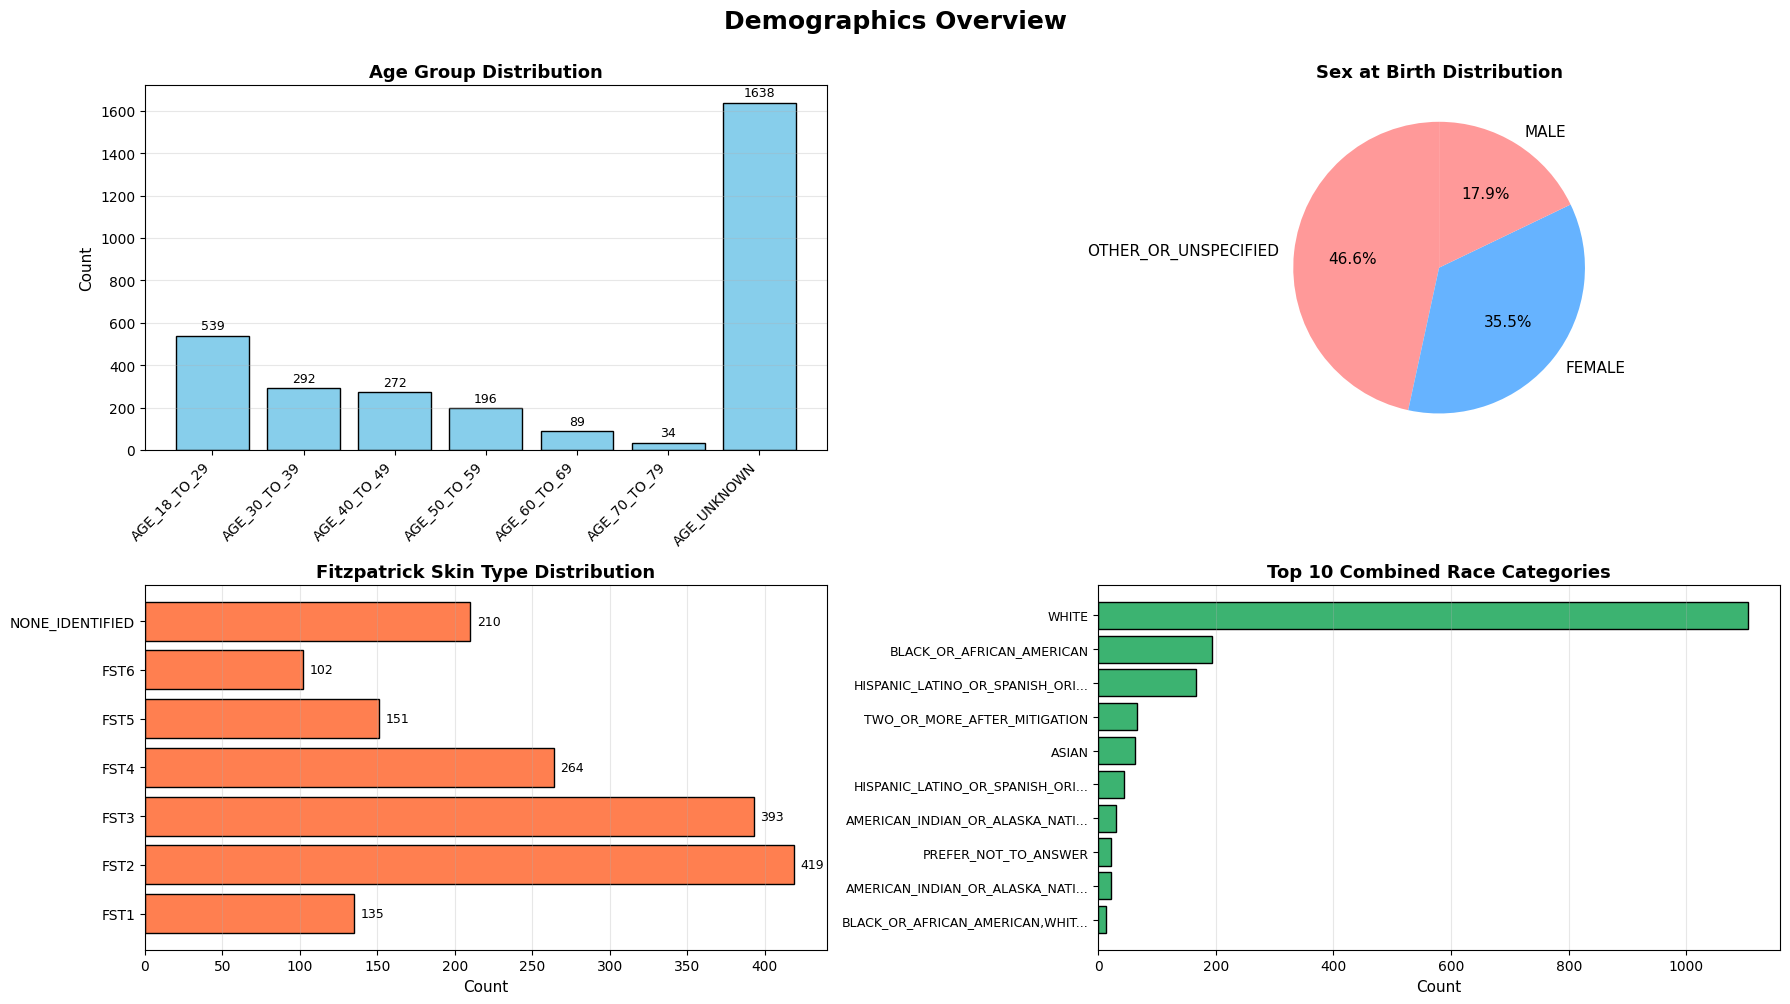

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# PLOT 1: Demographics Overview
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Demographics Overview', fontsize=18, fontweight='bold', y=1.00)

# Age Group
age_counts = metadata['age_group'].value_counts().sort_index()
axes[0, 0].bar(range(len(age_counts)), age_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_xticks(range(len(age_counts)))
axes[0, 0].set_xticklabels(age_counts.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].set_title('Age Group Distribution', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(age_counts.values):
    axes[0, 0].text(i, v + max(age_counts.values)*0.01, str(v), ha='center', va='bottom', fontsize=9)

# Sex at Birth
sex_counts = metadata['sex_at_birth'].value_counts()
colors_sex = ['#ff9999', '#66b3ff']
axes[0, 1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors_sex, textprops={'fontsize': 11})
axes[0, 1].set_title('Sex at Birth Distribution', fontsize=13, fontweight='bold')

# Fitzpatrick Skin Type
fitz_counts = metadata['fitzpatrick_skin_type'].value_counts().sort_index()
axes[1, 0].barh(range(len(fitz_counts)), fitz_counts.values, color='coral', edgecolor='black')
axes[1, 0].set_yticks(range(len(fitz_counts)))
axes[1, 0].set_yticklabels(fitz_counts.index)
axes[1, 0].set_xlabel('Count', fontsize=11)
axes[1, 0].set_title('Fitzpatrick Skin Type Distribution', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(fitz_counts.values):
    axes[1, 0].text(v + max(fitz_counts.values)*0.01, i, str(v), va='center', fontsize=9)

# Combined Race
race_counts = metadata['combined_race'].value_counts().head(10)
axes[1, 1].barh(range(len(race_counts)), race_counts.values, color='mediumseagreen', edgecolor='black')
axes[1, 1].set_yticks(range(len(race_counts)))
axes[1, 1].set_yticklabels([str(label)[:30] + '...' if len(str(label)) > 30 else label for label in race_counts.index], fontsize=9)
axes[1, 1].set_xlabel('Count', fontsize=11)
axes[1, 1].set_title('Top 10 Combined Race Categories', fontsize=13, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


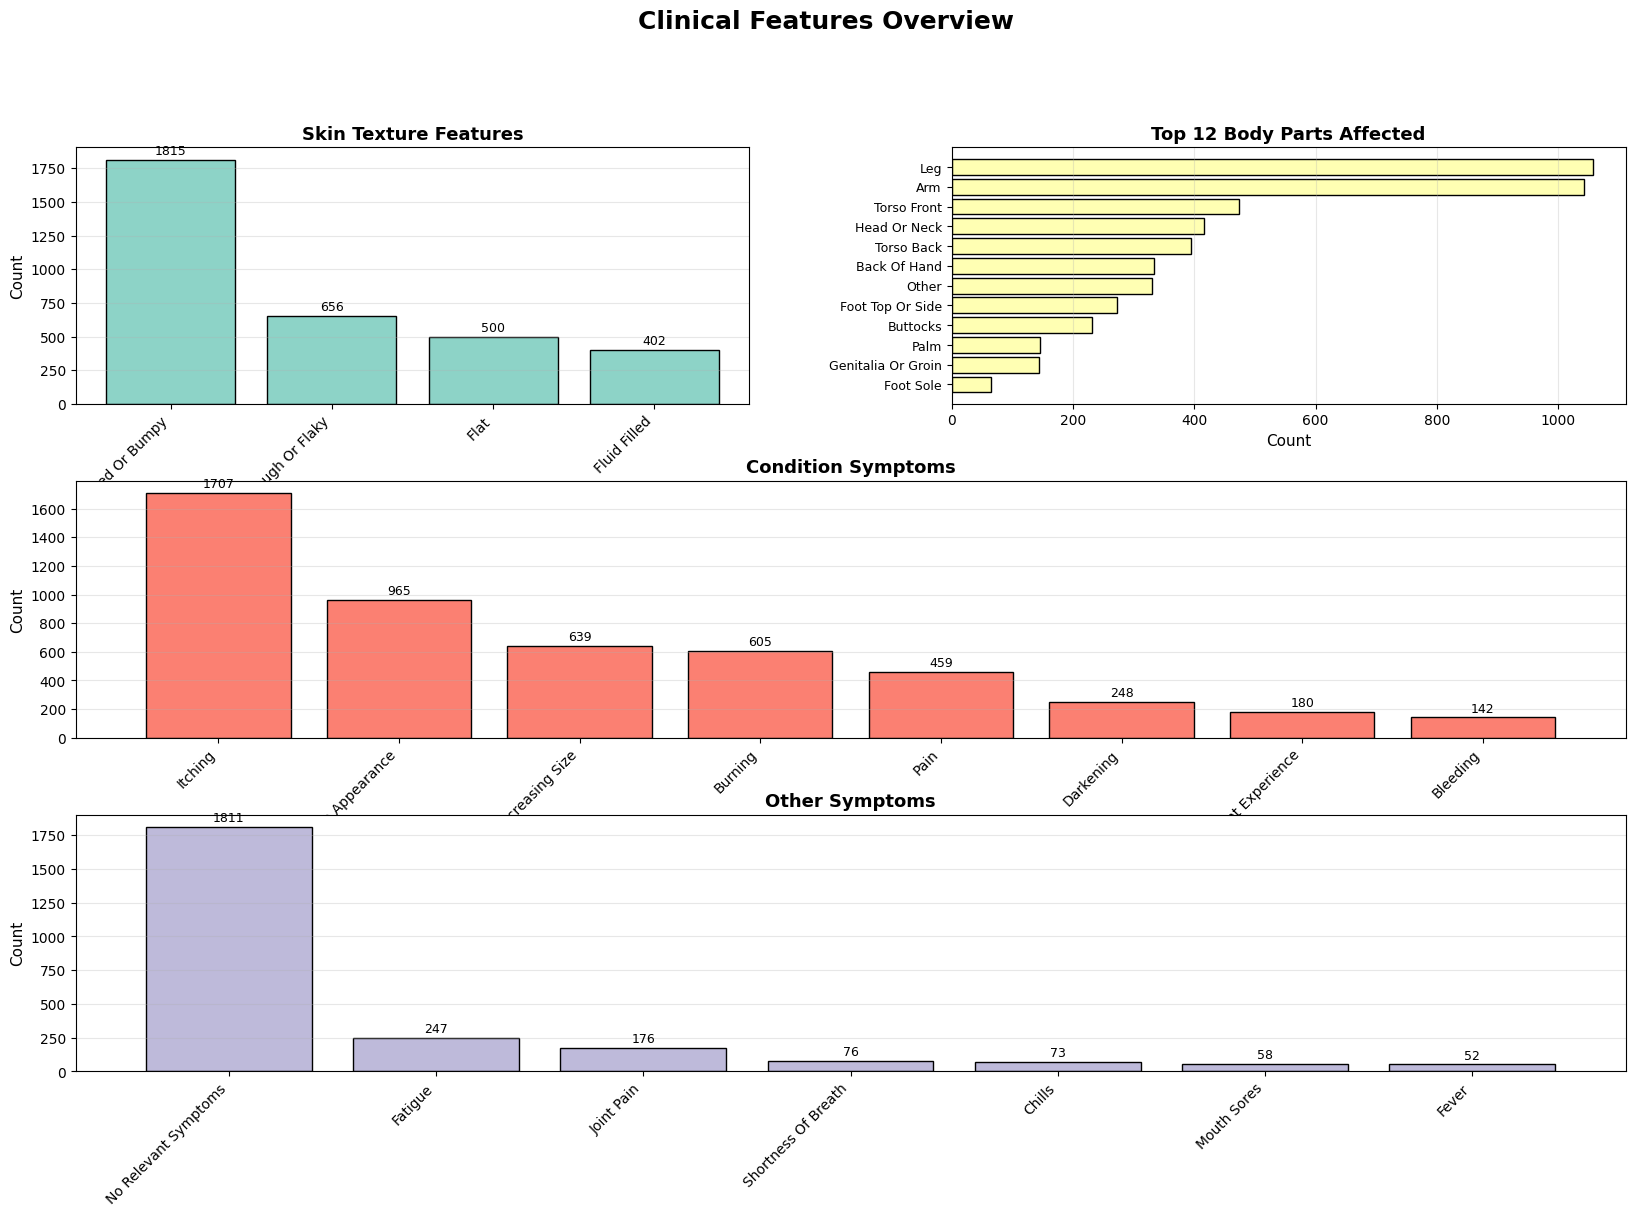

In [56]:
# PLOT 2: Clinical Features (Textures, Body Parts, Symptoms)
# Columns have YES/NO/NaN values
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
fig.suptitle('Clinical Features Overview', fontsize=18, fontweight='bold', y=0.995)

# Textures - count YES values
ax1 = fig.add_subplot(gs[0, 0])
texture_counts = {}
for col in texture_cols:
    texture_name = col.replace('textures_', '').replace('_', ' ').title()
    # Count YES values (case insensitive)
    texture_counts[texture_name] = (metadata[col].astype(str).str.upper() == 'YES').sum()
texture_counts = dict(sorted(texture_counts.items(), key=lambda x: x[1], reverse=True))
ax1.bar(range(len(texture_counts)), list(texture_counts.values()), color='#8dd3c7', edgecolor='black')
ax1.set_xticks(range(len(texture_counts)))
ax1.set_xticklabels(texture_counts.keys(), rotation=45, ha='right', fontsize=10)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_title('Skin Texture Features', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(texture_counts.values()):
    ax1.text(i, v + max(texture_counts.values())*0.01, str(int(v)), ha='center', va='bottom', fontsize=9)

# Top Body Parts - count YES values
ax2 = fig.add_subplot(gs[0, 1])
body_parts_counts = {}
for col in body_parts_cols:
    part_name = col.replace('body_parts_', '').replace('_', ' ').title()
    body_parts_counts[part_name] = (metadata[col].astype(str).str.upper() == 'YES').sum()
body_parts_counts = dict(sorted(body_parts_counts.items(), key=lambda x: x[1], reverse=True)[:12])
ax2.barh(range(len(body_parts_counts)), list(body_parts_counts.values()), color='#ffffb3', edgecolor='black')
ax2.set_yticks(range(len(body_parts_counts)))
ax2.set_yticklabels(body_parts_counts.keys(), fontsize=9)
ax2.set_xlabel('Count', fontsize=11)
ax2.set_title('Top 12 Body Parts Affected', fontsize=13, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# Condition Symptoms - count YES values
ax3 = fig.add_subplot(gs[1, :])
condition_symp_counts = {}
for col in condition_symptoms_cols:
    symp_name = col.replace('condition_symptoms_', '').replace('_', ' ').title()
    condition_symp_counts[symp_name] = (metadata[col].astype(str).str.upper() == 'YES').sum()
condition_symp_counts = dict(sorted(condition_symp_counts.items(), key=lambda x: x[1], reverse=True))
ax3.bar(range(len(condition_symp_counts)), list(condition_symp_counts.values()), color='#fb8072', edgecolor='black')
ax3.set_xticks(range(len(condition_symp_counts)))
ax3.set_xticklabels(condition_symp_counts.keys(), rotation=45, ha='right', fontsize=10)
ax3.set_ylabel('Count', fontsize=11)
ax3.set_title('Condition Symptoms', fontsize=13, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for i, v in enumerate(condition_symp_counts.values()):
    ax3.text(i, v + max(condition_symp_counts.values())*0.01, str(int(v)), ha='center', va='bottom', fontsize=9)

# Other Symptoms - count YES values
ax4 = fig.add_subplot(gs[2, :])
other_symp_counts = {}
for col in other_symptoms_cols:
    symp_name = col.replace('other_symptoms_', '').replace('_', ' ').title()
    other_symp_counts[symp_name] = (metadata[col].astype(str).str.upper() == 'YES').sum()
other_symp_counts = dict(sorted(other_symp_counts.items(), key=lambda x: x[1], reverse=True))
ax4.bar(range(len(other_symp_counts)), list(other_symp_counts.values()), color='#bebada', edgecolor='black')
ax4.set_xticks(range(len(other_symp_counts)))
ax4.set_xticklabels(other_symp_counts.keys(), rotation=45, ha='right', fontsize=10)
ax4.set_ylabel('Count', fontsize=11)
ax4.set_title('Other Symptoms', fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for i, v in enumerate(other_symp_counts.values()):
    ax4.text(i, v + max(other_symp_counts.values())*0.01, str(int(v)), ha='center', va='bottom', fontsize=9)

plt.show()


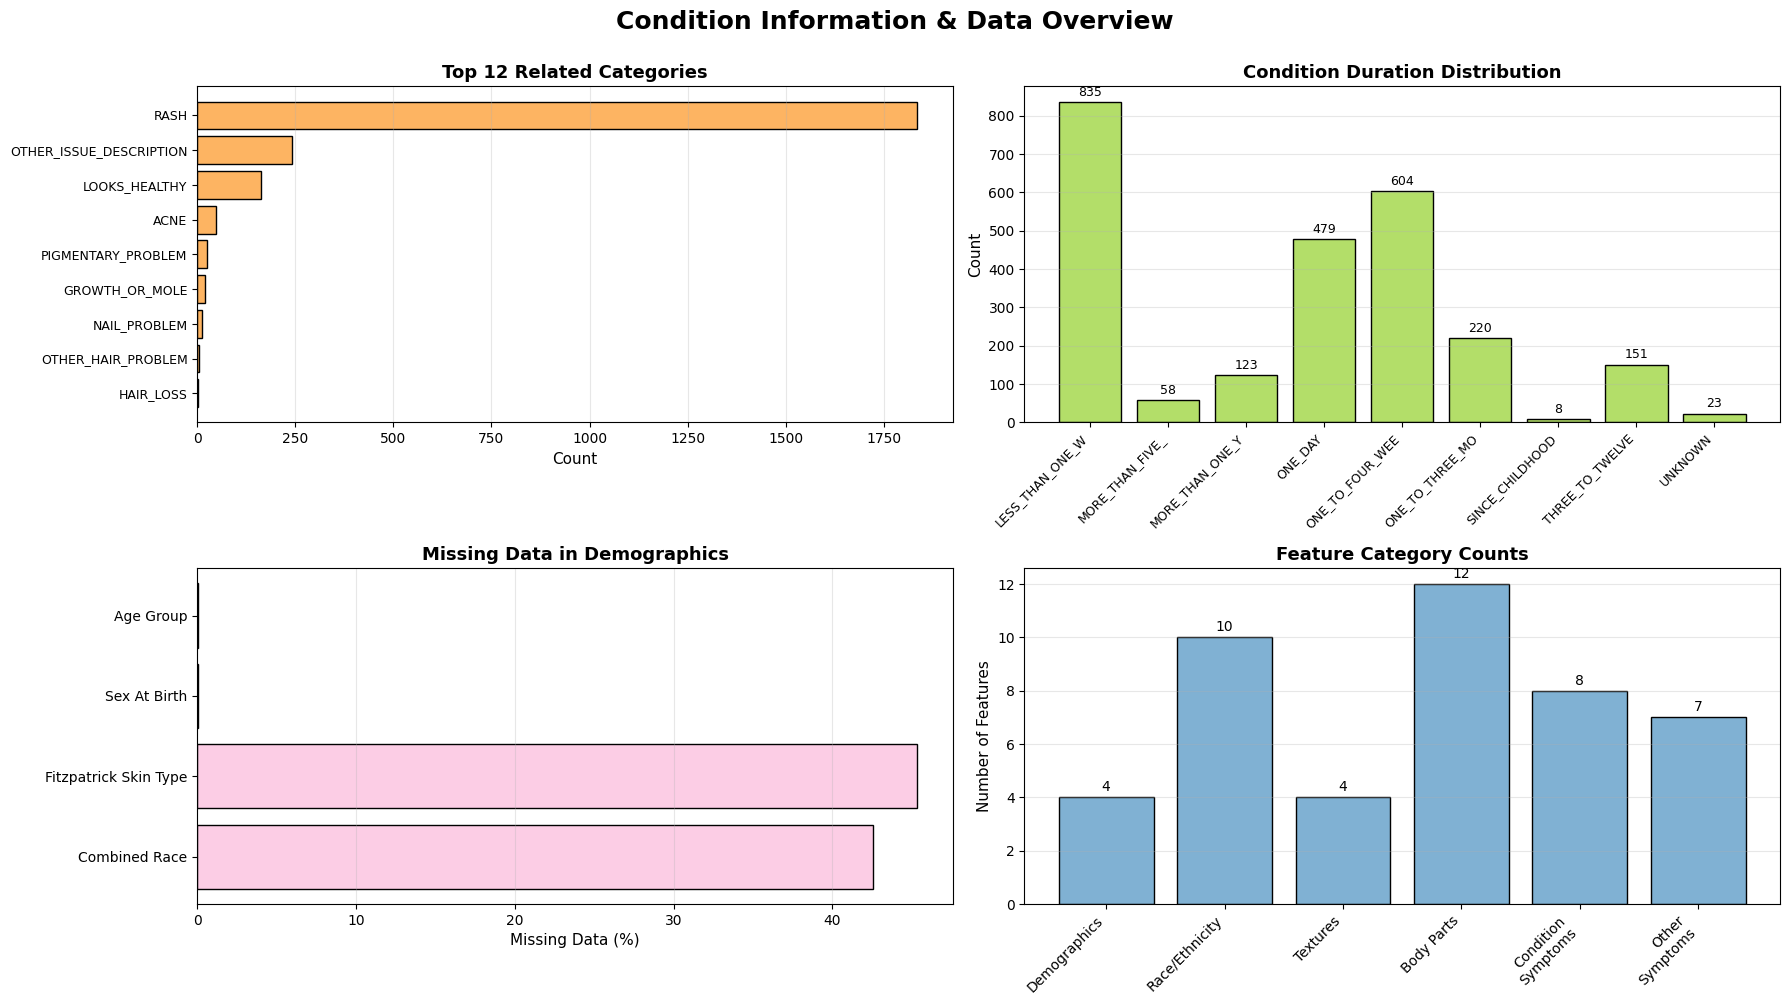

In [45]:
# PLOT 3: Condition Information & Summary
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Condition Information & Data Overview', fontsize=18, fontweight='bold', y=1.00)

# Related Category
related_counts = metadata['related_category'].value_counts().head(12)
axes[0, 0].barh(range(len(related_counts)), related_counts.values, color='#fdb462', edgecolor='black')
axes[0, 0].set_yticks(range(len(related_counts)))
axes[0, 0].set_yticklabels([str(label)[:35] + '...' if len(str(label)) > 35 else label for label in related_counts.index], fontsize=9)
axes[0, 0].set_xlabel('Count', fontsize=11)
axes[0, 0].set_title('Top 12 Related Categories', fontsize=13, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# Condition Duration
duration_counts = metadata['condition_duration'].value_counts().sort_index()
axes[0, 1].bar(range(len(duration_counts)), duration_counts.values, color='#b3de69', edgecolor='black')
axes[0, 1].set_xticks(range(len(duration_counts)))
axes[0, 1].set_xticklabels([str(label)[:15] for label in duration_counts.index], rotation=45, ha='right', fontsize=9)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].set_title('Condition Duration Distribution', fontsize=13, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(duration_counts.values):
    axes[0, 1].text(i, v + max(duration_counts.values)*0.01, str(v), ha='center', va='bottom', fontsize=9)

# Missing data in key demographic columns
missing_data = []
col_names = []
for col in demographic_cols:
    if col in metadata.columns:
        missing_pct = (metadata[col].isna().sum() / len(metadata)) * 100
        missing_data.append(missing_pct)
        col_names.append(col.replace('_', ' ').title())

axes[1, 0].barh(range(len(missing_data)), missing_data, color='#fccde5', edgecolor='black')
axes[1, 0].set_yticks(range(len(missing_data)))
axes[1, 0].set_yticklabels(col_names, fontsize=10)
axes[1, 0].set_xlabel('Missing Data (%)', fontsize=11)
axes[1, 0].set_title('Missing Data in Demographics', fontsize=13, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# Summary of feature categories
feature_counts = {
    'Demographics': len(demographic_cols),
    'Race/Ethnicity': len(race_ethnicity_cols),
    'Textures': len(texture_cols),
    'Body Parts': len(body_parts_cols),
    'Condition\nSymptoms': len(condition_symptoms_cols),
    'Other\nSymptoms': len(other_symptoms_cols)
}
axes[1, 1].bar(range(len(feature_counts)), feature_counts.values(), color='#80b1d3', edgecolor='black')
axes[1, 1].set_xticks(range(len(feature_counts)))
axes[1, 1].set_xticklabels(feature_counts.keys(), rotation=45, ha='right')
axes[1, 1].set_ylabel('Number of Features', fontsize=11)
axes[1, 1].set_title('Feature Category Counts', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(feature_counts.values()):
    axes[1, 1].text(i, v + max(feature_counts.values())*0.01, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [57]:
# METADATA SUMMARY STATISTICS
print("="*80)
print(" "*25 + "METADATA SUMMARY REPORT")
print("="*80)

print("\n1. DATASET SIZE:")
print(f"   Total Samples: {len(metadata)}")
print(f"   Total Features: {len(metadata.columns)}")

print("\n2. DEMOGRAPHICS:")
print(f"   Age Groups: {metadata['age_group'].nunique()} categories")
print(f"   Most common age: {metadata['age_group'].mode()[0]} ({metadata['age_group'].value_counts().iloc[0]} samples)")
print(f"   Sex Distribution: {dict(metadata['sex_at_birth'].value_counts())}")
print(f"   Fitzpatrick Types: {metadata['fitzpatrick_skin_type'].nunique()} types")
print(f"   Most common: Type {metadata['fitzpatrick_skin_type'].mode()[0]} ({metadata['fitzpatrick_skin_type'].value_counts().iloc[0]} samples)")

print("\n3. CLINICAL FEATURES:")
print(f"   Texture features: {len(texture_cols)} binary features")
print(f"   Top texture: {list(texture_counts.keys())[0]} ({int(list(texture_counts.values())[0])} samples)")
print(f"   Body part features: {len(body_parts_cols)} binary features")
print(f"   Top body part: {list(body_parts_counts.keys())[0]} ({int(list(body_parts_counts.values())[0])} samples)")
print(f"   Condition symptoms: {len(condition_symptoms_cols)} features")
print(f"   Top symptom: {list(condition_symp_counts.keys())[0]} ({int(list(condition_symp_counts.values())[0])} samples)")
print(f"   Other symptoms: {len(other_symptoms_cols)} features")

print("\n4. CONDITION INFO:")
print(f"   Related Categories: {metadata['related_category'].nunique()} unique")
print(f"   Top category: {metadata['related_category'].value_counts().index[0]} ({metadata['related_category'].value_counts().iloc[0]} samples)")
print(f"   Condition Duration: {metadata['condition_duration'].nunique()} unique values")

print("\n5. DATA QUALITY:")
total_values = len(metadata) * len(metadata.columns)
missing_values = metadata.isna().sum().sum()
print(f"   Total values: {total_values:,}")
print(f"   Missing values: {missing_values:,} ({missing_values/total_values*100:.2f}%)")
print(f"   Complete cases: {metadata.dropna().shape[0]} ({metadata.dropna().shape[0]/len(metadata)*100:.1f}%)")

print("\n" + "="*80)


                         METADATA SUMMARY REPORT

1. DATASET SIZE:
   Total Samples: 3061
   Total Features: 56

2. DEMOGRAPHICS:
   Age Groups: 7 categories
   Most common age: AGE_UNKNOWN (1638 samples)
   Sex Distribution: {'OTHER_OR_UNSPECIFIED': np.int64(1426), 'FEMALE': np.int64(1087), 'MALE': np.int64(547)}
   Fitzpatrick Types: 7 types
   Most common: Type FST2 (419 samples)

3. CLINICAL FEATURES:
   Texture features: 4 binary features
   Top texture: Raised Or Bumpy (1815 samples)
   Body part features: 12 binary features
   Top body part: Leg (1058 samples)
   Condition symptoms: 8 features
   Top symptom: Itching (1707 samples)
   Other symptoms: 7 features

4. CONDITION INFO:
   Related Categories: 9 unique
   Top category: RASH (1834 samples)
   Condition Duration: 9 unique values

5. DATA QUALITY:
   Total values: 171,416
   Missing values: 117,221 (68.38%)
   Complete cases: 0 (0.0%)

